In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('df_augmented.pkl')
df

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto
...,...,...,...,...,...,...
26002,data augmentation,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance
26003,data augmentation,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation
26004,data augmentation,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto
26005,data augmentation,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante


## Data Exploratory / Cleaning

##### Checking NaN values

In [3]:
df[df.isnull().any(axis=1)]

,date,note,auteur,avis,assureur,produit
802,23 novemb...,2,durocherdesducs-49489,NaN,GMF,auto
16218,27 novemb...,3,NaN,Intervention supprimée à la demande de l'inter...,Intériale,prevoyance


##### Removing rows with no 'avis'

In [4]:
df = df[df['avis'].notna()]

In [5]:
df['note'].describe()

count    26006.000000
mean         2.828578
std          1.481901
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: note, dtype: float64

Count distincts per columns

In [6]:
df.nunique()

date         1950
note            5
auteur      23676
avis        25967
assureur       57
produit        14
dtype: int64

On formate pour avoir les dates en type date

In [7]:
df['date_old'] = df['date']
                            

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1775763093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_old'] = df['date']


In [8]:
df['date'] = df['date'].str.replace(' janvier ', '01')
df['date'] = df['date'].str.replace(' février ', '02')
df['date'] = df['date'].str.replace(' mars ', '03')
df['date'] = df['date'].str.replace(' avril ', '04')
df['date'] = df['date'].str.replace(' mai ', '05')
df['date'] = df['date'].str.replace(' juin ', '06')
df['date'] = df['date'].str.replace(' juillet ', '07')
df['date'] = df['date'].str.replace(' août ', '08')
df['date'] = df['date'].str.replace(' septembre ', '09')
df['date'] = df['date'].str.replace(' octobre ', '10')
df['date'] = df['date'].str.replace(' novembre ', '11')
df['date'] = df['date'].str.replace(' décembre ', '12')
df['date'] = df['date'].str.replace(' ', '')
df['date'] = df['date'].str[:8]
df['date'] = df['date'].str.replace('dataaugm', '01012050')

df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1185808494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].str.replace(' janvier ', '01')
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1185808494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].str.replace(' février ', '02')
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1185808494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,date,note,auteur,avis,assureur,produit,date_old
0,06092021,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...
1,03052021,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...
2,21032021,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...
3,10062021,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...
4,29012017,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...
...,...,...,...,...,...,...,...
26002,01012050,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation
26003,01012050,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation
26004,01012050,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation
26005,01012050,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation


In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d%m%Y')
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\4058775223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%d%m%Y')


,date,note,auteur,avis,assureur,produit,date_old
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...
...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation


In [10]:
df['année'] = pd.to_datetime(df['date']).dt.year
df['mois'] = pd.to_datetime(df['date']).dt.month
df['jour'] = pd.to_datetime(df['date']).dt.day
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1792403013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['année'] = pd.to_datetime(df['date']).dt.year
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1792403013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mois'] = pd.to_datetime(df['date']).dt.month
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1792403013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29
...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1


# Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Répartition des notes des avis'}, xlabel='note', ylabel='count'>

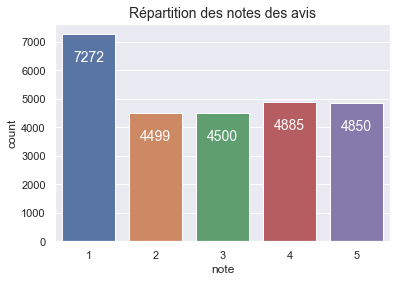

In [12]:
sns.set_theme(style="darkgrid")
countplot_avis = sns.countplot(x = "note", data = df)
countplot_avis.set_title('Répartition des notes des avis', fontsize=14)
# Ajout du count sur la visualisation
for p in countplot_avis.patches:
    countplot_avis.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
countplot_avis

### Longueur moyenne des avis par note
On ajoute une colonne comptant la longueur des avis

In [13]:
df['avis_length'] = df.avis.str.len()
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\4260939534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avis_length'] = df.avis.str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720
...,...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1,270
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1,312
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1,154
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1,176


In [14]:
length_per_notes = df.groupby('note', as_index=False)['avis_length'].mean()
length_per_notes

,note,avis_length
0,1,513.025853
1,2,479.835519
2,3,293.312000
3,4,201.488229
4,5,192.407629


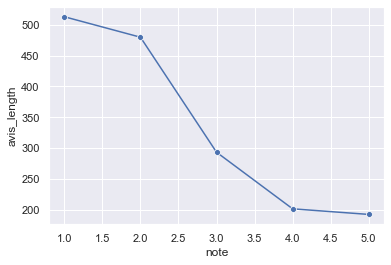

In [15]:
length_per_note_lineplot = sns.lineplot(data = length_per_notes, x = 'note', y = 'avis_length', marker = "o")
sns.set(rc={'figure.figsize':(15,15)})

On voit bien que la taille des avis évoluent significativement en fonction de la note. Ce paramètre peut être intéressant à garder pour la suite de notre étude.

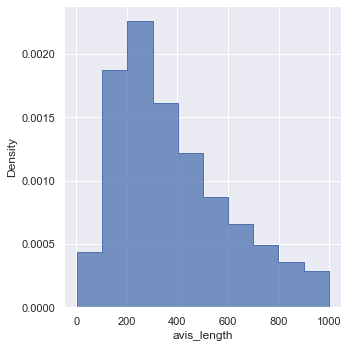

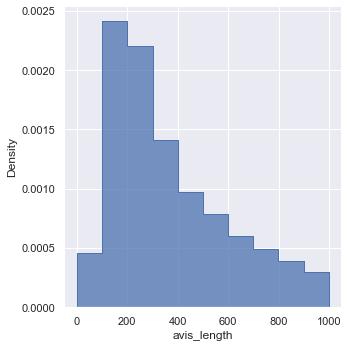

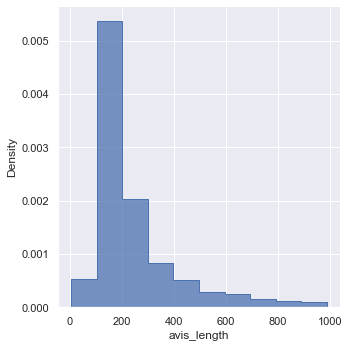

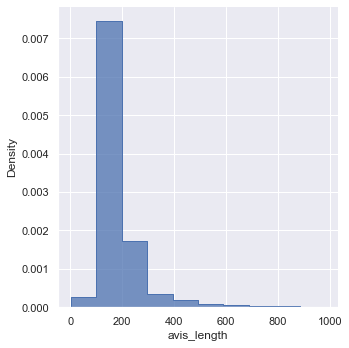

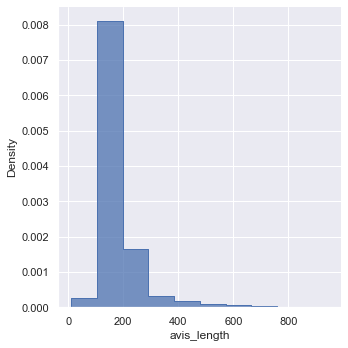

In [16]:
sns.displot(df.loc[(df['note'] == 1) & (df['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(df.loc[(df['note'] == 2) & (df['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(df.loc[(df['note'] == 3) & (df['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(df.loc[(df['note'] == 4) & (df['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")
sns.displot(df.loc[(df['note'] == 5) & (df['avis_length'] < 1000)], x = "avis_length", bins = 10, element="step", stat="density")

Voyons si ce résultat varient beaucoup en fonction des 'produits' que nous avons.

In [17]:
df['produit'].value_counts()

auto                                     15198
sante                                     3808
moto                                      2252
habitation                                2172
prevoyance                                 827
credit                                     684
vie                                        622
animaux                                    396
multirisque-professionnelle                 20
garantie-decennale                          12
assurances-professionnelles                  8
responsabilite-civile-professionnelle        5
flotte-automobile                            1
['auto']                                     1
Name: produit, dtype: int64

<AxesSubplot:title={'center':"Répartition du nombre d'avis par an"}, xlabel='année', ylabel='count'>

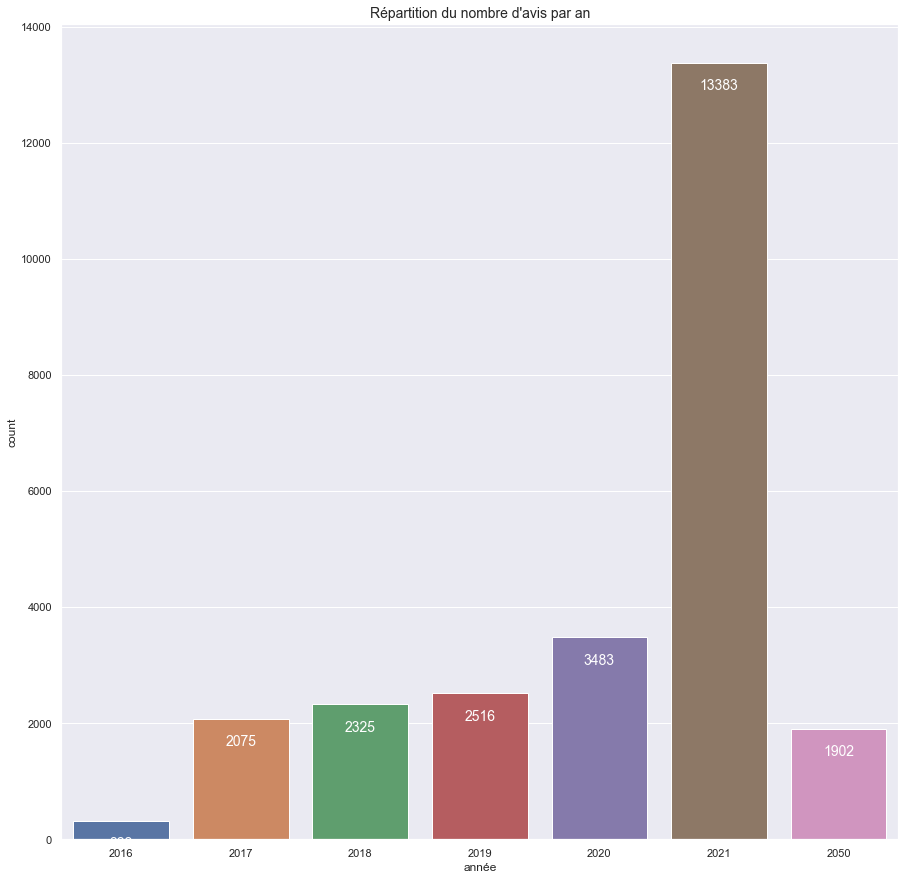

In [18]:
sns.set_theme(style="darkgrid")
countplot_année = sns.countplot(x = "année", data = df)
countplot_année.set_title("Répartition du nombre d'avis par an", fontsize=14)
# Ajout du count sur la visualisation
for p in countplot_année.patches:
    countplot_année.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)
countplot_année

Faisons maintenant une analyse sur les majuscules.
On ajoute une colonne calculant le pourcentage de majuscule dans un avis

In [19]:
df['maj_pourcentage'] = df['avis'].str.findall(r'[A-Z]').str.len()/df['avis'].str.findall(r'[a-zA-Z]').str.len()
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\3145580977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maj_pourcentage'] = df['avis'].str.findall(r'[A-Z]').str.len()/df['avis'].str.findall(r'[a-zA-Z]').str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042
...,...,...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1,270,0.034826
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1,312,0.060870
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1,154,0.024793
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1,176,0.021429


In [20]:
df['exclam_pourcentage'] = df['avis'].str.findall(r'[!]').str.len()/df['avis'].str.findall(r'[a-zA-Z]').str.len()
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\3850562777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exclam_pourcentage'] = df['avis'].str.findall(r'[!]').str.len()/df['avis'].str.findall(r'[a-zA-Z]').str.len()


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1,270,0.034826,0.000000
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1,312,0.060870,0.000000
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1,154,0.024793,0.000000
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1,176,0.021429,0.000000


In [21]:
import string
def max_maj_in_a_row(row):
    avis = row['avis']   
    #On enlève les espaces
    avis = avis.replace(' ', '')
    #On enlève la punctuation
    avis = avis.translate(str.maketrans('', '', string.punctuation))

    max_maj = 0
    maj_in_a_row = 0
    for char in avis:
        if char.isupper():
            maj_in_a_row = maj_in_a_row + 1
        else : maj_in_a_row = 0
        if maj_in_a_row > max_maj:
            max_maj = maj_in_a_row
    return max_maj

In [22]:
df['max_maj_in_a_row'] = df.apply(lambda row: max_maj_in_a_row(row), axis = 1)
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\4106667530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_maj_in_a_row'] = df.apply(lambda row: max_maj_in_a_row(row), axis = 1)


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage,max_maj_in_a_row
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000,1
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000,0
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000,1
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000,1
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1,270,0.034826,0.000000,2
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1,312,0.060870,0.000000,5
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1,154,0.024793,0.000000,1
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1,176,0.021429,0.000000,2


Comme l'on pouvait s'y attendre, il y a plus de majuscules de suite en moyenne dans les mauvais commentaires

In [23]:
import string
def max_exclam_in_a_row(row):
    avis = row['avis']   
    #On enlève les espaces
    avis = avis.replace(' ', '')

    max_exclam = 0
    exclam_in_a_row = 0
    for char in avis:
        if char == '!':
            exclam_in_a_row = exclam_in_a_row + 1
        else : exclam_in_a_row = 0
        if exclam_in_a_row > max_exclam:
            max_exclam = exclam_in_a_row
    return max_exclam

df['max_exclam_in_a_row'] = df.apply(lambda row: max_exclam_in_a_row(row), axis = 1)
df

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\3986001234.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_exclam_in_a_row'] = df.apply(lambda row: max_exclam_in_a_row(row), axis = 1)


,date,note,auteur,avis,assureur,produit,date_old,année,mois,jour,avis_length,maj_pourcentage,exclam_pourcentage,max_maj_in_a_row,max_exclam_in_a_row
0,2021-09-06,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto,06 septem...,2021,9,6,156,0.016260,0.000000,1,0
1,2021-05-03,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto,03 mai 20...,2021,5,3,267,0.000000,0.000000,0,0
2,2021-03-21,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto,21 mars 2...,2021,3,21,167,0.007299,0.000000,1,0
3,2021-06-10,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto,10 juin 2...,2021,6,10,155,0.008264,0.000000,1,0
4,2017-01-29,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto,29 janvie...,2017,1,29,720,0.009042,0.009042,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,2050-01-01,3,data augmentation,"Bonjour depuis le 1er novembre 2016, je suis à...",Ag2r La Mondiale,prevoyance,data augmentation,2050,1,1,270,0.034826,0.000000,2,0
26003,2050-01-01,3,data augmentation,Continuer les montagnes endommagées. S.DE a. S...,AXA,habitation,data augmentation,2050,1,1,312,0.060870,0.000000,5,0
26004,2050-01-01,3,data augmentation,"La carte était abordable, le tournage de faceb...",L'olivier Assurance,auto,data augmentation,2050,1,1,154,0.024793,0.000000,1,0
26005,2050-01-01,3,data augmentation,Un service client mutuel très réactif est effi...,Génération,sante,data augmentation,2050,1,1,176,0.021429,0.000000,2,0


In [24]:
def info_avis(num):
    return df['avis'][num] + "\n" + str(df['note'][num])

In [25]:
y_list = list(range(11000,11005))
for y in y_list:
    print(df['avis'][y] + "\nNote : " + str(df['note'][y]))

La digitalisation de la procédure de la souscription est une satisfaction totale. Le prix est vraiment accessible voire acceptable pour les garanties souscrites Merci
Note : 4
Ne savent même pas défendre un conducteur quand il n'est pas en tort. Témoins qui atteste que c'est la voiture qui a fait un écart sur moi. Et la complémentaire remboursement équipement c'est de la M..... Un casque de 2 mais rembourser à seulement 45% de sa valeur.

Une HONTE DE SE DIRE LA MUTUELLE DES MOTARDS
Note : 1
Bonjour,
Je trouve extrêmement frustrant, le fait que malgré mon bonus et ma deuxième année consécutive chez vous, le prix de mon assurance auto soit rester le même que l'an dernier.
J'envisage de prospecter la concurrence.. 
Note : 2
Les prélèvements se passent à merveille, les conditions commerciales varient en fonction du changement du francisé. Un sans franchise racheté en cas de sinistre responsable, quelque soit le nombre de sinistres, aujourd'hui c'est au bon vouloir du franchisé. Plus confi

On souhaite maintenant remplacer tous les espaces multiples en un simple espace, pareil pour la ponctuation. Et forcer toutes les lettres à être en minuscules.

In [26]:
df['avis'] = df['avis'].str.replace('.', ' ')
df['avis'] = df['avis'].str.replace(',', ' ')
df['avis'] = df['avis'].str.replace(':', ' ')
df['avis'] = df['avis'].str.replace(';', ' ')
df['avis'] = df['avis'].str.replace('?', ' ')
df['avis'] = df['avis'].str.replace('!', ' ')
df['avis'] = df['avis'].str.replace('\s{2,}', ' ')

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\2229176505.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['avis'] = df['avis'].str.replace('.', ' ')
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\2229176505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avis'] = df['avis'].str.replace('.', ' ')
C:\Users\matth\AppData\Local\Temp\ipykernel_15160\2229176505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [27]:
df['avis'][10]

"c'est une honte totale nous avons toutes nos assurances avec allianz ils traitent notre réclamation avec incompétence nous menaçons de les quitter ils annulent néanmoins notre assurance à la fin de ce contrat éviter "

Réussir à comprendre comment lemmatizer les mots en français avec Spacy, ça devrait être possible (https://github.com/sammous/spacy-lefff)

In [28]:
import spacy

In [29]:
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer()

nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('french_lemmatizer', name='lefff')

In [30]:
def get_lemma_avis(row):
    avis_temp = row['avis']
    avis_temp = nlp(avis_temp)
    avis = ""
    for word in avis_temp:
        avis = avis + " " + str(word.lemma_)
    return avis

In [31]:
df['avis'] = df.apply(lambda row: get_lemma_avis(row), axis = 1)
df['avis'][10]

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\1401282848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avis'] = df.apply(lambda row: get_lemma_avis(row), axis = 1)


' ce être un honte total nous avoir tout notre assurance avec allianz il traiter notre réclamation avec incompétence nous menacer de le quitter il annuler néanmoins notre assurance à le fin de ce contrat éviter'

In [32]:
print(info_avis(958))

 suite à le ajout de un box de parking privatif sur mon contrat de assurance habitation je avoir appeler le maif afin de le informer de changement ce changement n' être en général matérialiser que par un simple avener ne modifier pas ou quasiment pas le prime de assurance quell agréable surprise de découvrir que le formule minimum ( primordial ) que je avoir jusque alors souscrite ne permettre pas de assurer un simple box de parking impossible de obtenir le moindre information constructif au téléphone si ce n' être en résumé " ce être comme cela " je n' avoir pas trouver le information exclure le assurance de box dans le condition général de contrat et le conseiller n' avoir pas être capable de me énoncer clairement le texte aller dans ce sens me voilà donc obliger de souscrir le assurance de un niveau supérieur faire flamber mon prime de assurance annuel de plus de 90 euro pour un box de 12m2
1


On enlève les stopwords

In [33]:
import nltk
from nltk.corpus import stopwords

In [34]:
stop = stopwords.words('french')
# stop.append('cela')
# stop.append('autre')
# stop.append('donc')
# stop.append('chez')
# stop.append('n')
df['avis'] = df['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['avis'][10]

C:\Users\matth\AppData\Local\Temp\ipykernel_15160\340183818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avis'] = df['avis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


'être honte total avoir tout assurance allianz traiter réclamation incompétence menacer quitter annuler néanmoins assurance fin contrat éviter'

Encode avec un TF-IDF ou un BOW puis tester les différents modèles
Trying a LightGBM

TF_IDF

In [35]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    words = tokeniser.tokenize(text)
    return words

In [37]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text)

# Fit to the data and transform to feature matrix
avis_vectorised = vectoriser.fit_transform(df['avis'])

# Convert sparse matrix to dataframe
avis_vectorised = pd.DataFrame.sparse.from_spmatrix(avis_vectorised)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in avis_vectorised.columns:
    avis_vectorised.rename(columns={col: col_map[col]+ '_word'}, inplace=True)
avis_vectorised


,0_word,00_word,000_word,0000_word,00000_word,0000000000_word,0000007599607304_word,0000009154533473_word,0001_word,000e_word,...,ぉぅ_word,が_word,ください_word,ぜひ_word,て_word,に_word,役立て_word,興味_word,않느냐_word,홍일표_word
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On concat avec ce qu'on avait avant

In [38]:
df = pd.concat([df, avis_vectorised], axis=1).reindex(df.index)

On drop les colonnes qui nous intéresse pas et on get_dummies les colonnes à catégories, puis on export le dataframe en csv pour appliquer nos modèles de ML

In [39]:
columns_to_encode = ['assureur', 'produit']
columns_to_delete = ['avis','date','date_old','année','mois','jour']

for column in columns_to_delete:
    df = df.drop([column], axis = 1)
df = pd.get_dummies(df, columns=columns_to_encode)

#On substract 1 aux labels pour avoir des values entre 0 et 4
df['note'] = df.note.sub(1)

df['note'] = df['note'].astype(int)

In [40]:
df.to_pickle('df_augmented_processed.pkl')